# k -medoids and c-means
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.
## Exercise 1
Use the s3.txt dataset from the previous lab.
- Run your k-means code 20 times with k = 15. Save the minimum, maximum and average values of the loss.
- Modify your code such that it uses the k-means++ initialization. Perform the same experiment of point 1 and compare the obtained values.
- Build a scree plot by plotting the best (ie. the lowest) loss out of 20 runs for k = 2, . . . , 20 (with k-means++). What is the optimal value of k?
- Modify your code to perform k-medoids. Repeat the assignment of point 3 with the new implementation.
- Modify your code to perform c-means. Repeat the assignment of point 3 with the new implementation.

In [13]:
import numpy as np
from unsupervised_learning.clustering import KMeans, KMedoids, FuzzyCMeans
import matplotlib.pyplot as plt

In [14]:
data = np.loadtxt('Unsupervised_Learning_2024/Datasets/s3.txt')
data = (data-data.mean())/data.std()
kmeans_losses = []
for i in range(20):
  kmeans = KMeans(15, 'random')
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
print(f"Best: {min(kmeans_losses):e}")
print(f"Worst: {max(kmeans_losses):e}")
print(f"Average: {sum(kmeans_losses)/20:e}")

Best: 4.310000e+02
Worst: 5.860000e+02
Average: 4.915000e+02


In [15]:
kmeans_losses = []
for i in range(20):
  kmeans = KMeans(15, 'kmeans++')
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
print(f"Best: {min(kmeans_losses):e}")
print(f"Worst: {max(kmeans_losses):e}")
print(f"Average: {sum(kmeans_losses)/20:e}")

Best: 4.310000e+02
Worst: 5.440000e+02
Average: 4.613000e+02


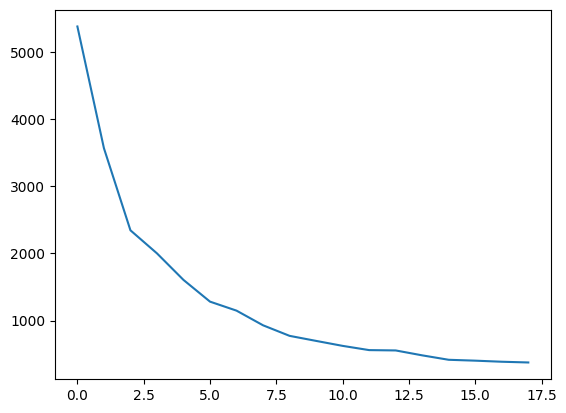

In [16]:
kmeans_losses = []
for i in range(2, 20):
  kmeans = KMeans(i, 'kmeans++')
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
plt.plot(kmeans_losses)
plt.show()


In [17]:
kmeans_losses = []
for i in range(20):
  kmeans = KMedoids(15, 'kmeans++', max_iter=30)
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
print(f"Best: {min(kmeans_losses):e}")
print(f"Worst: {max(kmeans_losses):e}")
print(f"Average: {sum(kmeans_losses)/20:e}")

Best: 4.330000e+02
Worst: 5.900000e+02
Average: 4.976000e+02


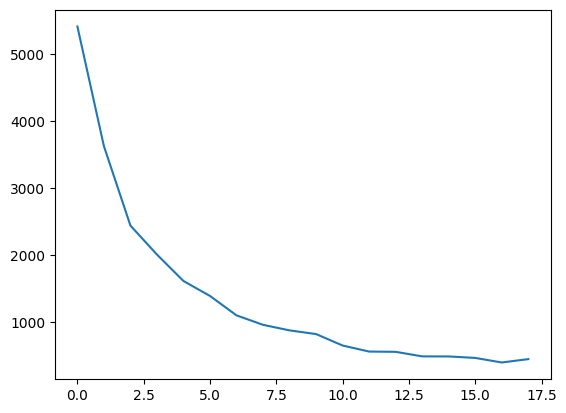

In [18]:
kmeans_losses = []
for i in range(2, 20):
  kmeans = KMedoids(i, 'kmeans++', max_iter=30)
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
plt.plot(kmeans_losses)
plt.show()

In [19]:
kmeans_losses = []
for i in range(20):
  kmeans = FuzzyCMeans(15, init='kmeans++')
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
print(f"Best: {min(kmeans_losses):e}")
print(f"Worst: {max(kmeans_losses):e}")
print(f"Average: {sum(kmeans_losses)/20:e}")

Best: 4.320000e+02
Worst: 5.020000e+02
Average: 4.593500e+02


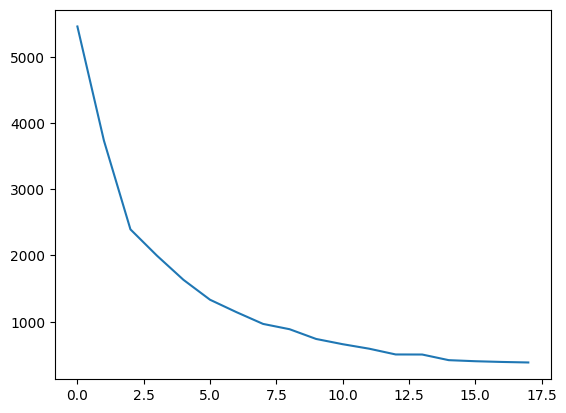

In [20]:
kmeans_losses = []
for i in range(2, 20):
  kmeans = FuzzyCMeans(i, 2)
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
plt.plot(kmeans_losses)
plt.show()

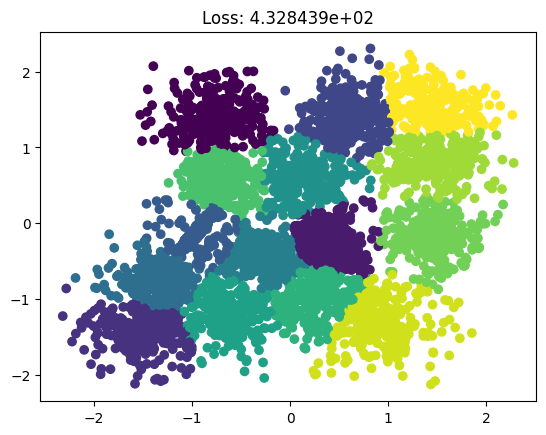

In [22]:
cmeans = FuzzyCMeans(15, 2)
clusters = cmeans.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.title(f"Loss: {cmeans.loss:e}")
plt.show()